## Logistic regression

In the first part of this exercise, we'll build a logistic regression model to predict whether a patient will going to get a cardiac arrest.  Suppose that you are a cardiologist and you want to determine each patient's chance of getting a heart attack based on the body measurments. You have historical data from previous patients that you can use as a training set for logistic regression.  To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores. Use the `heart.csv` dataset that comes with the exercises.

Let's start by examining the data.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
heart_data = pd.read_csv("./data/heart.csv")


## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names

Questions:

1. What is the dependent variable (column name)?
2. What are the independent variables?
3. Should we normalize the data?
4. What are the column data-types?

In [8]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [12]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
heart_data.info()

print()
print("Columns in heart_data:")

heart_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Columns in heart_data:


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Answers:

1. The dependent column is **target** (which describes if the patient has had a hard disease)
2. Every column except the target column
3. Yes
4. Most of them ar `int64` except for one which is `float64`

# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the logistic regression model?
2.  Can we accept the basic assumptions of the logistic regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?

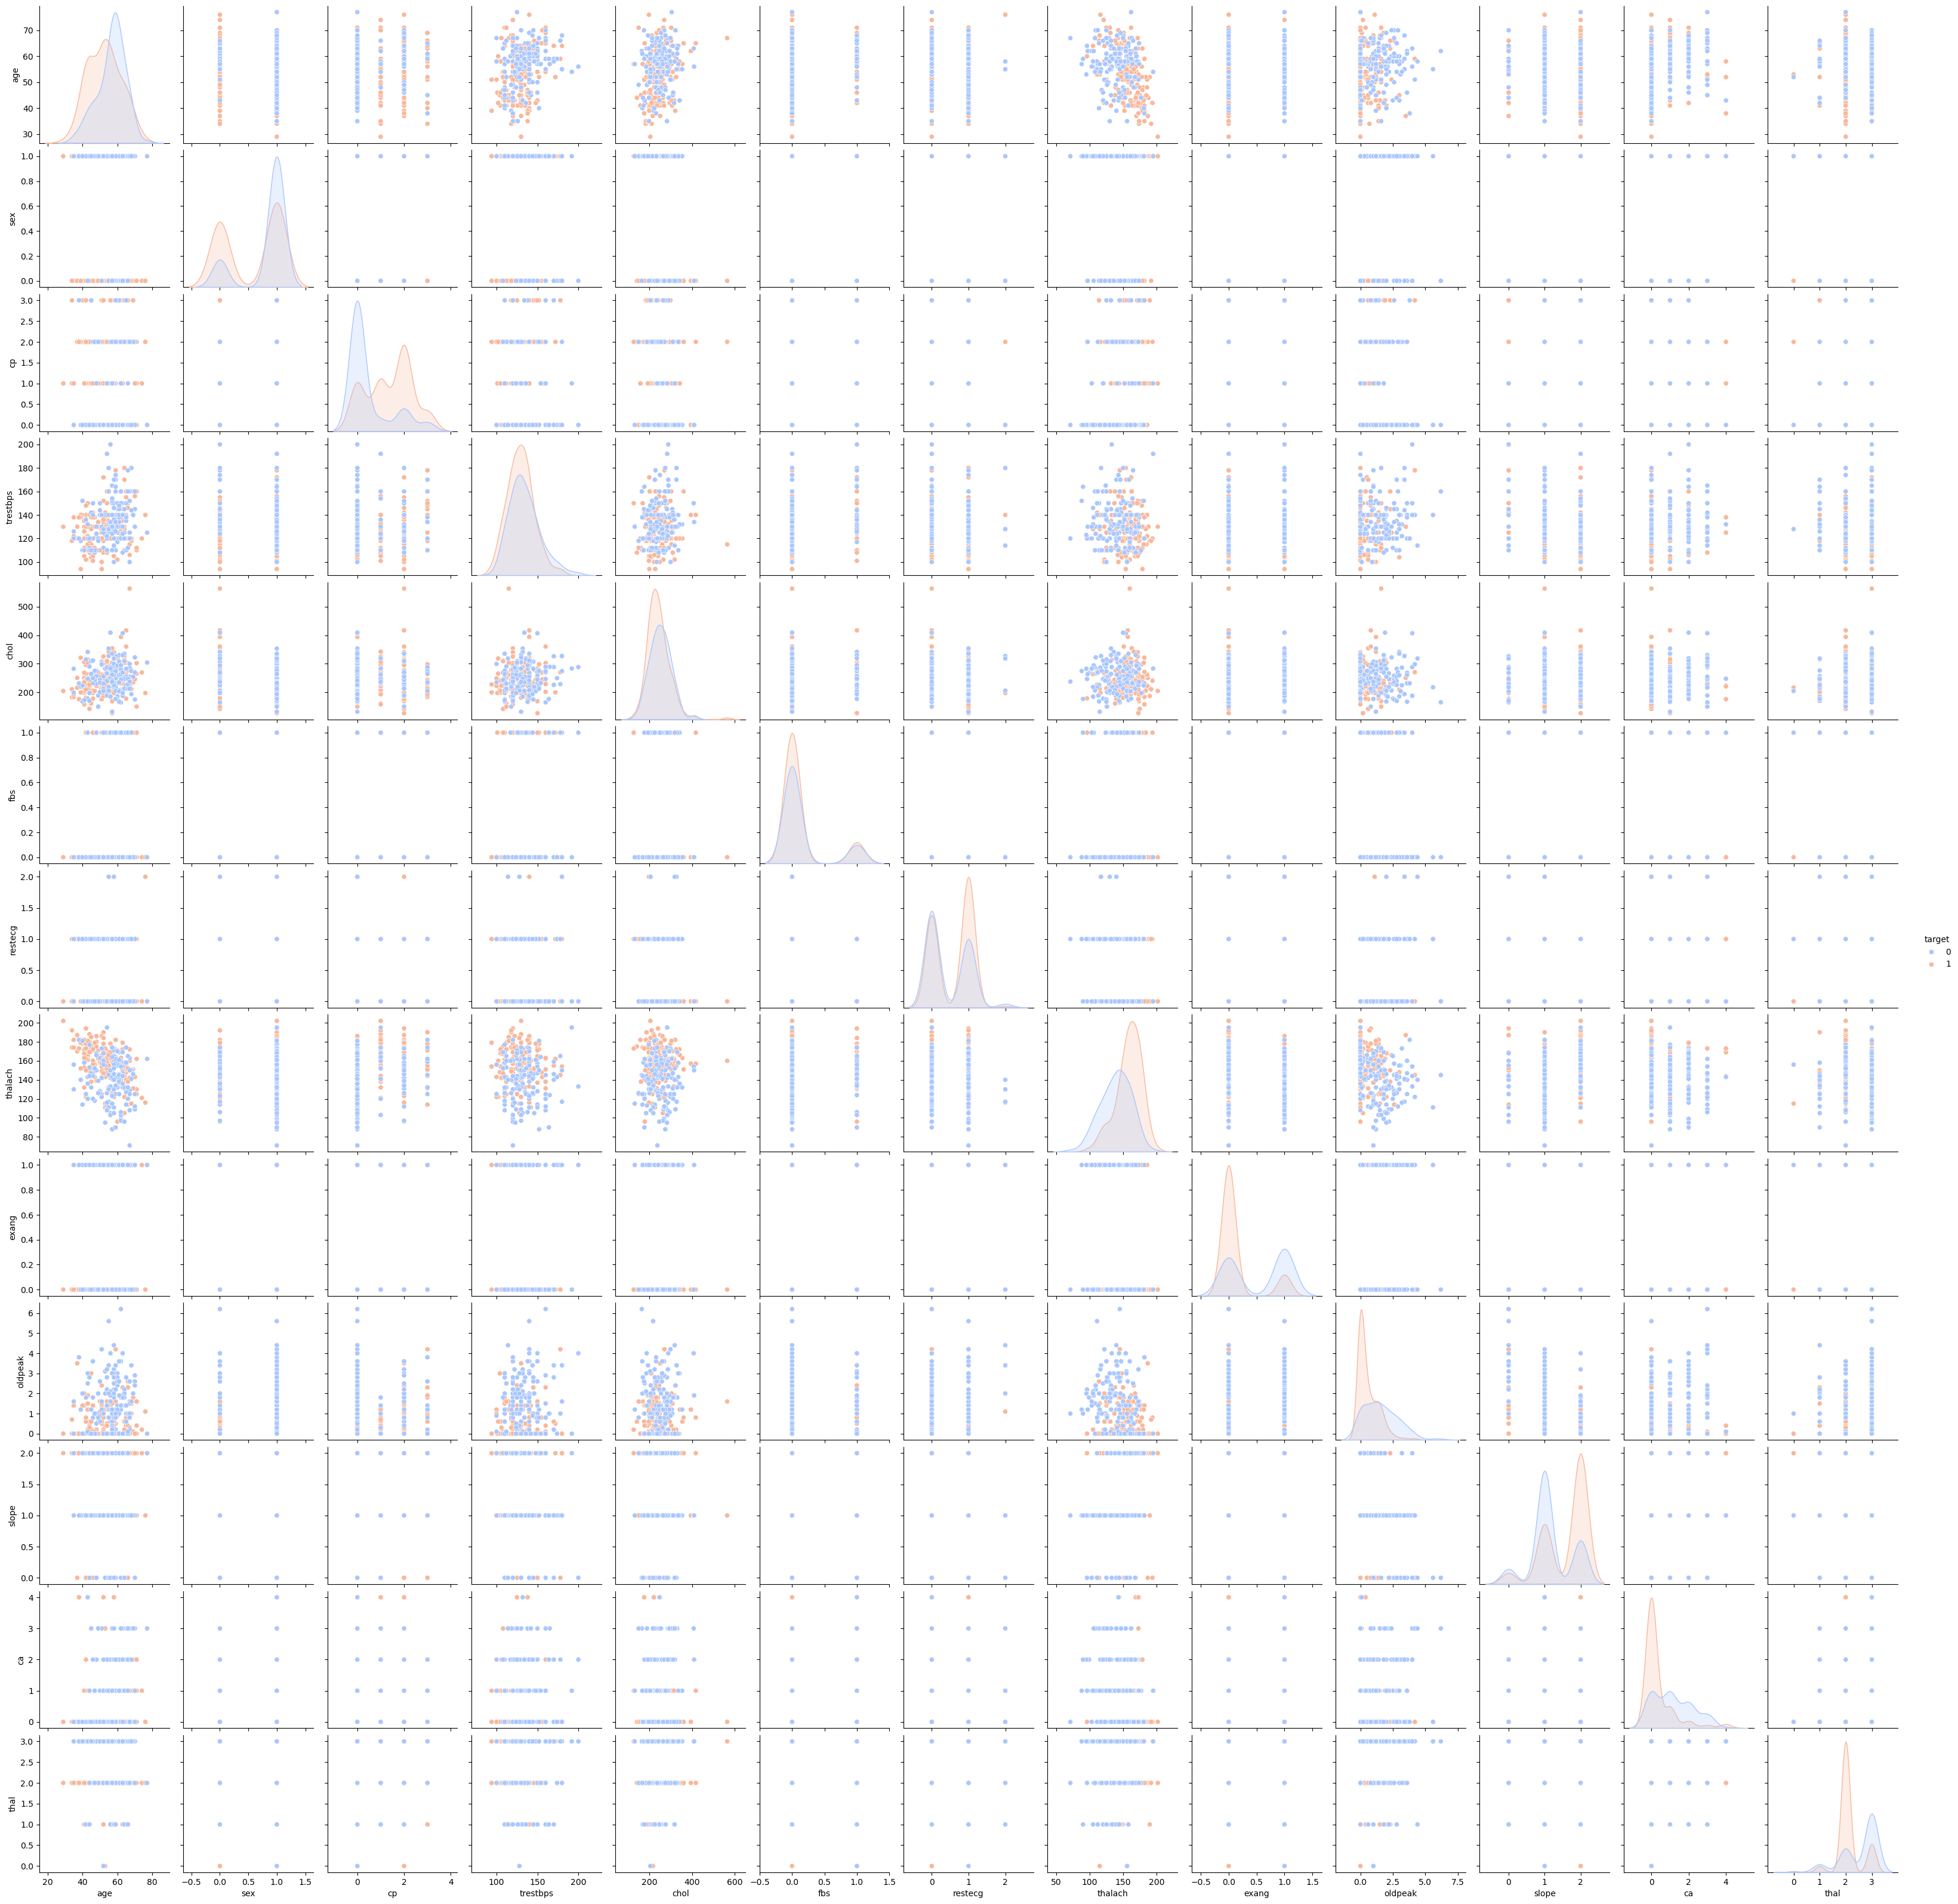

In [18]:
sns.pairplot(heart_data, hue="target", palette="coolwarm", diag_kind="kde")
plt.show()

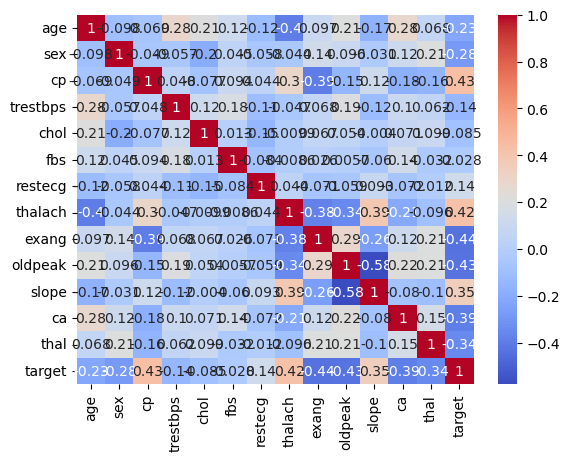

In [21]:
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm")
plt.show()

### Answer:

1.  **What are the assumptions of the logistic regression model?** 
    - Is there a categorical dependent variable: yes
    - Are there independent observations: yes
    - Linearity of logit: i have no idea (TODO)
    - No or little multicollinearity: i have no idea
    - Large sample size: I mean relatively speaking... maybe
2.  **Can we accept the basic assumptions of the logistic regression model?** For the most part yes
3.  **Judging by the scatter-plots, do you see any patterns in the data?**: There is an overlap of most of the data that corresponds to the target. However, looking at them there are also some patterns to it that separates them.
4.  **Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?** Yes! both in the negative and positive direction
5.  **Are there correlations among independent variables?** Among a lot of them: yes

First we need to create a sigmoid function.

Task:
1.  Implement the function

In [ ]:
def sigmoid(???):
    # Put the code here
    pass

Make sure the function is correctly implemented.

Task:
1.  Plot the function.

Task:
1. Write the cost function to evaluate a solution.

In [ ]:
def cost(???):
    # Code here
    pass

Task:
1. Separate the data to `X` and `y` arrays.
2. Separate the training set and evaluation set.

Task:
1. Check the shape of our arrays to make sure everything looks good.

Task:
1. Compute the cost for our initial solution (eyeball the initial value, e.g. zero or some random value).

Task:
  Implement a function to compute the gradient (parameter updates) given our training data, labels, and model parameters.

In [ ]:
def gradient(???):
    ## code here
    pass

Task:
  1. Use the scikit-learn library (or write your own optimizer using the gradient function) to optimize the classifier parameters

Task:
1. Calculate the cost for the optimized parameters

Task:
1. Write a function that will output predictions for a dataset X using our learned parameters.
2. Use this function to score and print the training accuracy of our classifier.

In [ ]:
def predict(???):
    pass